Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import joblib
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Collection

In [ ]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Datasets/autism_screening.csv')

In [ ]:
# number of rows & columns in the dataset
df.shape

(704, 21)

In [ ]:
# first 5 rows of the dataset
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


<ipython-input-7-472079bf0a4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class/ASD', data=df, palette='coolwarm')


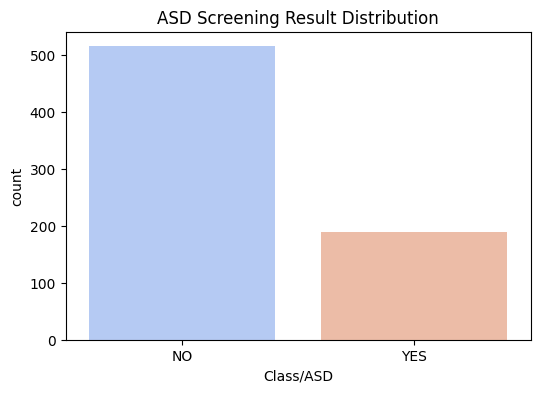

In [ ]:
# 1. Class Distribution (ASD vs. Non-ASD)
plt.figure(figsize=(6,4))
sns.countplot(x='Class/ASD', data=df, palette='coolwarm')
plt.title('ASD Screening Result Distribution')
plt.show()

Data Cleaning

In [ ]:
# checking for missing values
df.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


Handle Missing Values in Age Column

In [ ]:
df['age'].fillna(df['age'].mode()[0], inplace=True)

<ipython-input-9-d10af3aef653>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mode()[0], inplace=True)


In [ ]:
print(df['age'].isnull().sum())

0


Data Analysis and Visulaization

Numerical Columns:

age
result

In [ ]:
# set the desired theme
sns.set_theme(style="darkgrid")

Distribution Plots

Mean: 29.673295454545453
Median: 27.0


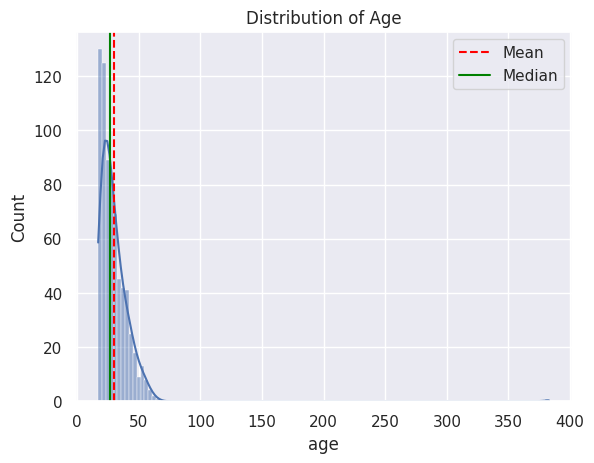

In [ ]:
# Histogram for "age"

sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 4.875
Median: 4.0


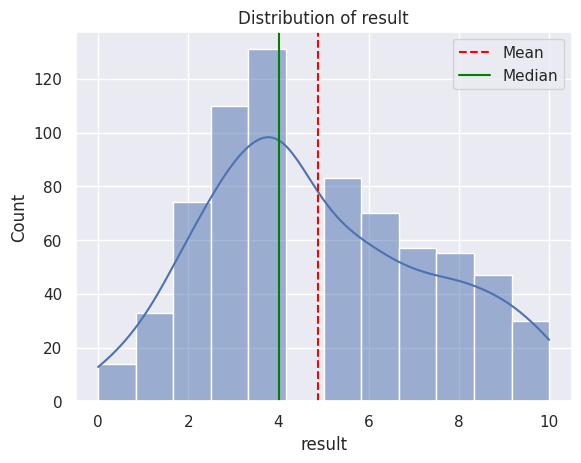

In [ ]:
# Histogram for "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# add vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Box plots for identifying outliers in the numerical columns

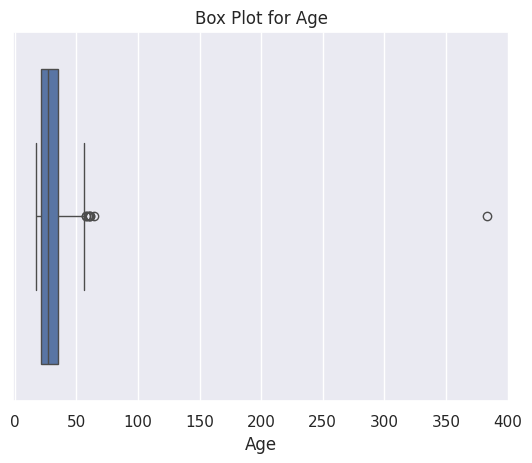

In [ ]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

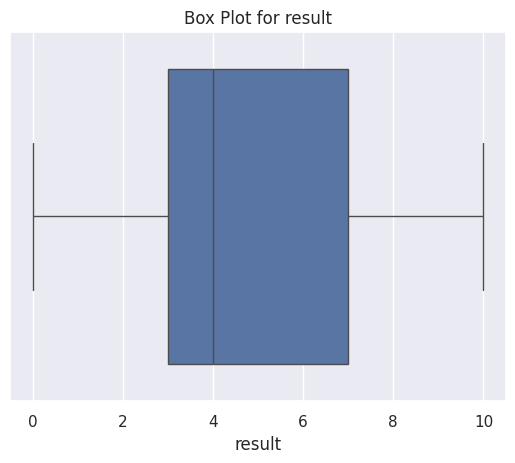

In [ ]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [ ]:
# statistical measures of the dataset
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.673295,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.490476,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


Data Preprocessing

In [ ]:
# set the desired theme
sns.set_theme(style="darkgrid")

In [ ]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
NO,515
YES,189


In [ ]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,233
Asian,123
?,95
Middle Eastern,92
Black,43
South Asian,36
Others,30
Latino,20
Hispanic,13


In [ ]:
df['relation'].value_counts()

,count
relation,
Self,522
?,95
Parent,50
Relative,28
Others,5
Health care professional,4


In [ ]:
df.replace("?", pd.NA, inplace=True)  # Replace '?' with NaN
df.dropna(inplace=True)  # Remove missing values
# Merge both "others" categories into a single "Others"
df['ethnicity'].replace({"others": "Others"}, inplace=True)

<ipython-input-21-1e26d6f3afdc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ethnicity'].replace({"others": "Others"}, inplace=True)


Convert Categorical Features to Numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric
encoder = LabelEncoder()
categorical_columns = ['gender', 'ethnicity', 'jundice', 'austim', 'relation', 'Class/ASD']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

<ipython-input-23-3d286269ef09>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette="pastel", ax=axes[i])
<ipython-input-23-3d286269ef09>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette="pastel", ax=axes[i])
<ipython-input-23-3d286269ef09>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette="pastel", ax=axes[i])
<ipython-input-23-3d286269ef09>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

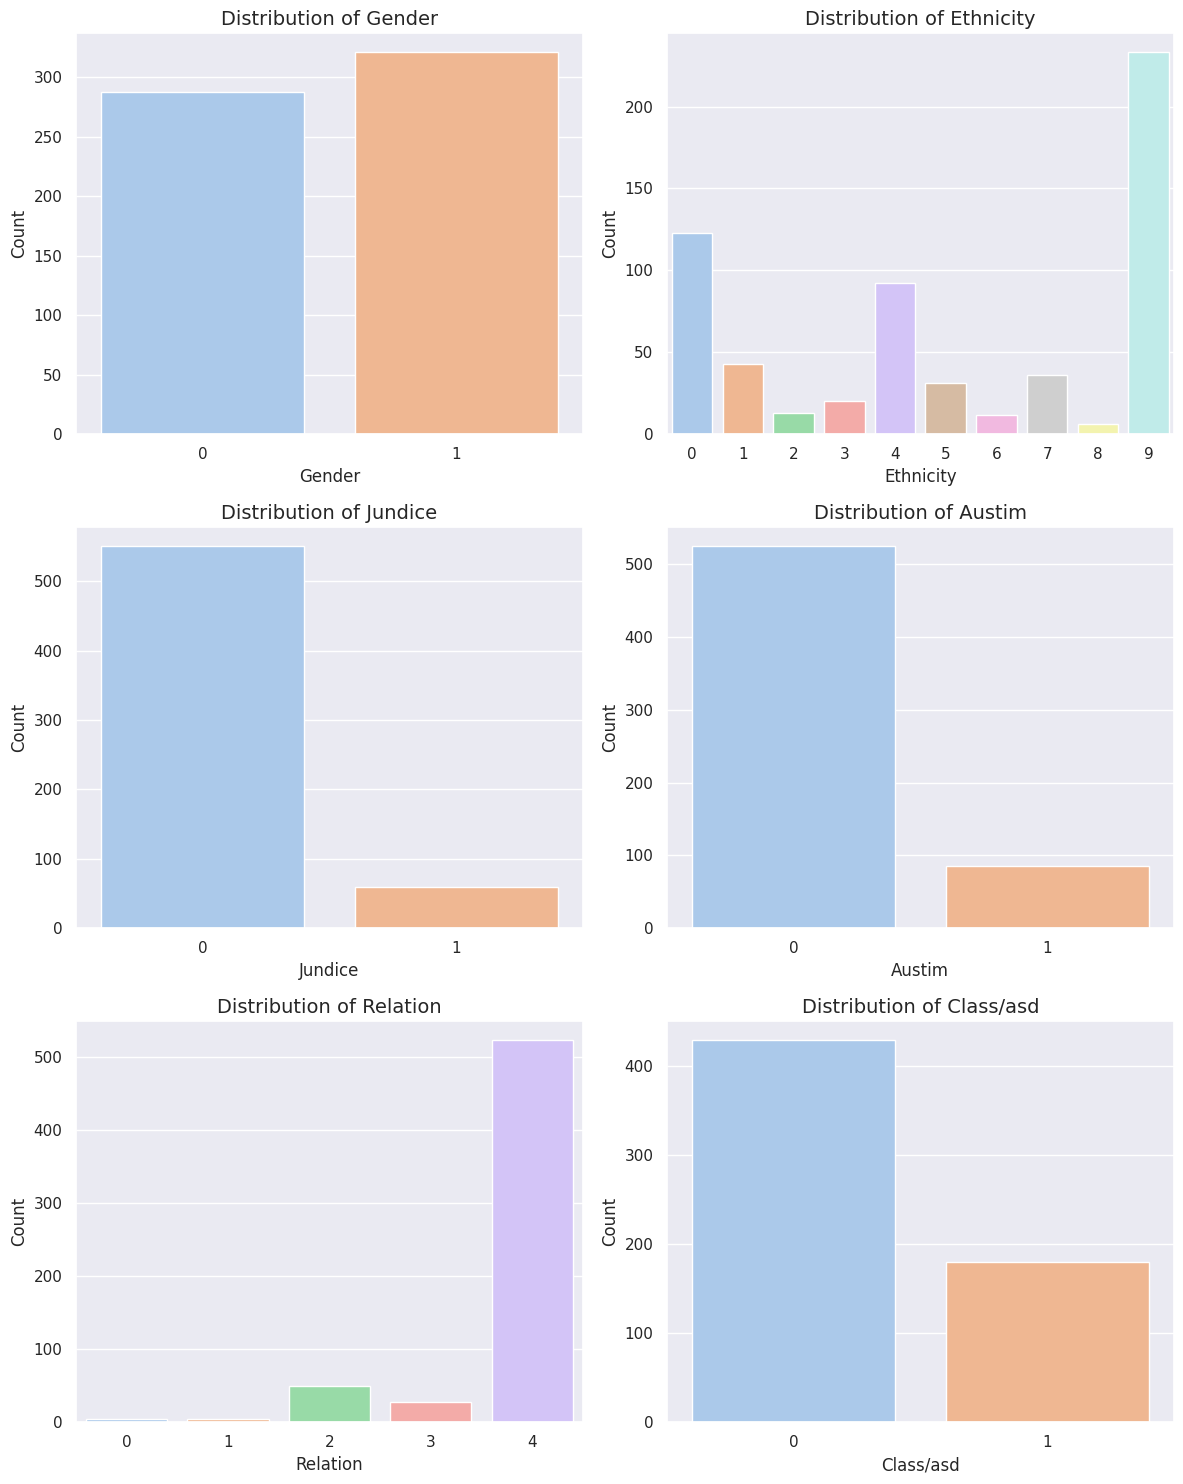

In [ ]:
# Dynamically determine the number of rows and columns for subplots
num_plots = len(categorical_columns)
rows = (num_plots + 1) // 2  # Ensure enough rows
cols = 2  # Maximum 2 columns

# Set figure size dynamically
fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate count plots for each categorical feature
for i, feature in enumerate(categorical_columns):
    sns.countplot(x=df[feature], palette="pastel", ax=axes[i])
    axes[i].set_title(f"Distribution of {feature.capitalize()}", fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)

# Hide any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,9,0,0,United States,no,6.0,18 and more,4,0
1,1,1,0,1,0,0,0,1,0,1,...,1,3,0,1,Brazil,no,5.0,18 and more,4,0
2,1,1,0,1,1,0,1,1,1,1,...,1,3,1,1,Spain,no,8.0,18 and more,2,1
3,1,1,0,1,0,0,1,1,0,1,...,0,9,0,1,United States,no,6.0,18 and more,4,0
5,1,1,1,1,1,0,1,1,1,1,...,1,5,1,0,United States,no,9.0,18 and more,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,...,0,6,0,0,Australia,no,10.0,18 and more,4,1
699,0,1,0,1,1,0,1,1,1,1,...,0,9,0,0,Russia,no,7.0,18 and more,4,1
700,1,0,0,0,0,0,0,1,0,1,...,1,2,0,0,Mexico,no,3.0,18 and more,2,0
702,1,0,0,1,1,0,1,0,1,1,...,1,7,0,0,Pakistan,no,6.0,18 and more,4,0


Bivariate Analysis

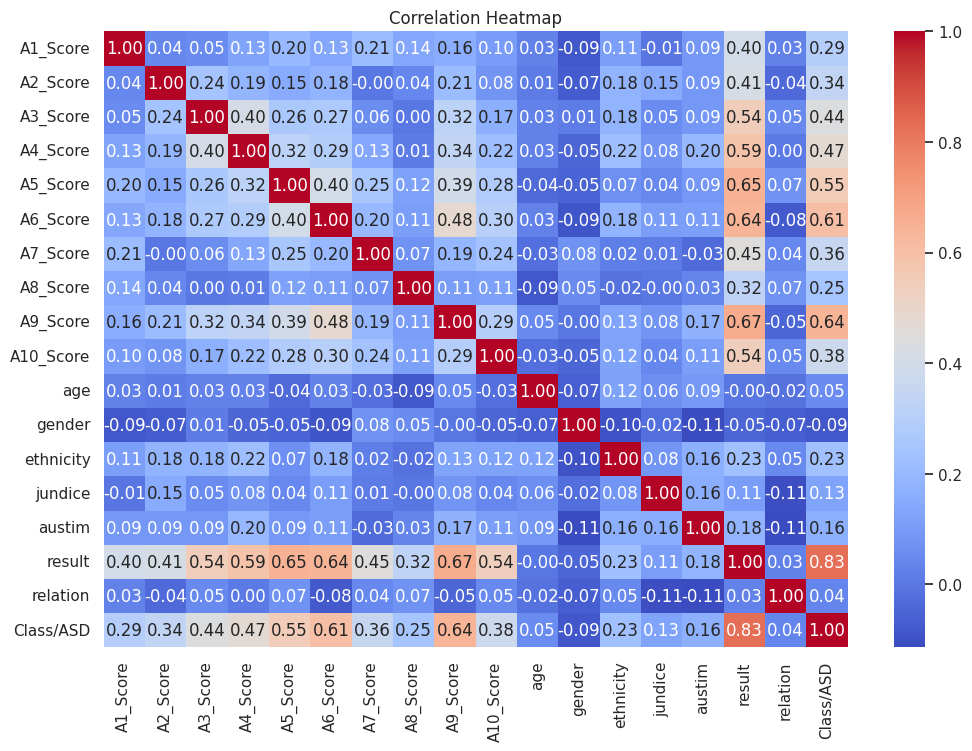

In [ ]:
# Plot correlation heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Model Training

In [ ]:
X = df.drop(['Class/ASD', 'contry_of_res', 'age_desc', 'used_app_before','result'], axis=1)
Y = df['Class/ASD']  # Target column

In [ ]:
X.shape

(609, 16)

In [ ]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,relation
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,4
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,4
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,2
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,4
5,1,1,1,1,1,0,1,1,1,1,36.0,1,5,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,27.0,0,6,0,0,4
699,0,1,0,1,1,0,1,1,1,1,25.0,0,9,0,0,4
700,1,0,0,0,0,0,0,1,0,1,34.0,1,2,0,0,2
702,1,0,0,1,1,0,1,0,1,1,35.0,1,7,0,0,4


In [ ]:
Y.shape

(609,)

In [ ]:
Y

,Class/ASD
0,0
1,0
2,1
3,0
5,1
...,...
698,1
699,1
700,0
702,0


Train & Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(609,) (487,) (122,)


In [ ]:
X_train

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,relation
168,0,0,1,1,1,0,0,1,1,1,36.0,0,3,0,1,4
264,1,0,0,0,1,0,0,1,1,0,23.0,0,0,0,0,4
629,1,0,0,0,1,0,1,1,1,1,23.0,0,0,0,0,4
671,1,1,1,1,1,0,0,1,0,1,21.0,1,2,0,0,4
166,0,0,1,0,0,0,0,1,1,1,26.0,0,5,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0,0,1,0,1,0,0,1,0,1,42.0,0,4,0,0,4
119,1,1,1,1,1,1,0,0,1,0,42.0,1,9,0,0,4
291,1,1,0,1,1,0,0,1,1,1,32.0,0,1,0,0,4
509,0,1,0,0,0,0,0,0,0,1,40.0,0,9,1,0,4


In [ ]:
Y_test

,Class/ASD
313,1
435,0
547,0
660,1
131,0
...,...
446,1
266,0
224,1
617,0


Model Training:

1. Random Forest Classifier
2. Logistic Regression
3. SVC (Support Vector Classifier)
4. K-Neighbors Classifier

In [ ]:
models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    # "SVM": SVC(C=1, kernel="linear", class_weight="balanced")
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

Standardize the dataset

In [ ]:
# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train the Model

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)  # Train the model

Make Predictions

In [ ]:
Y_pred = {}
for name, model in models.items():
    Y_pred[name] = model.predict(X_test_scaled)  # Make predictions

Model Evaluation

Accuracy Score & Classification Report

In [ ]:
accuracy_results = {}
classification_reports = {}

for name in models.keys():
    accuracy = round(accuracy_score(Y_test, Y_pred[name]) * 100, 2)
    accuracy_results[name] = accuracy  # Store accuracy
    print("Accuracy - "+name+":", accuracy, "%")

    # Generate classification report
    classification_reports[name] = classification_report(Y_test, Y_pred[name])
    print("Classification Report - "+name+":")
    print(classification_reports[name])

Accuracy - RandomForest: 92.62 %
Classification Report - RandomForest:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        81
           1       0.90      0.88      0.89        41

    accuracy                           0.93       122
   macro avg       0.92      0.91      0.92       122
weighted avg       0.93      0.93      0.93       122

Accuracy - LogisticRegression: 100.0 %
Classification Report - LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        41

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

Accuracy - SVM: 95.08 %
Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        81
           1       0.93      0

In [ ]:
os.makedirs("saved_models", exist_ok=True)  # Create folder if not exists

for name, model in models.items():
    model_filename = f"saved_models/{name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(model, model_filename)  # Save model
    print(f"Model '{name}' saved as '{model_filename}'.")

Model 'RandomForest' saved as 'saved_models/randomforest_model.pkl'.
Model 'LogisticRegression' saved as 'saved_models/logisticregression_model.pkl'.
Model 'SVM' saved as 'saved_models/svm_model.pkl'.
Model 'KNN' saved as 'saved_models/knn_model.pkl'.


Accuary Report File

In [ ]:
report_filename = "saved_models/all_models_report.txt"

with open(report_filename, "w") as f:
    f.write("🚀 Autism Detection - Model Performance Report\n\n")

    for name in models.keys():
        f.write("=" * 50 + "\n")
        f.write(f"📌 Model: {name}\n")
        f.write(f"🎯 Accuracy: {accuracy_results[name]}%\n\n")
        f.write("📊 Classification Report:\n")
        f.write(classification_reports[name] + "\n\n")


 Confusion Matrix for All Models

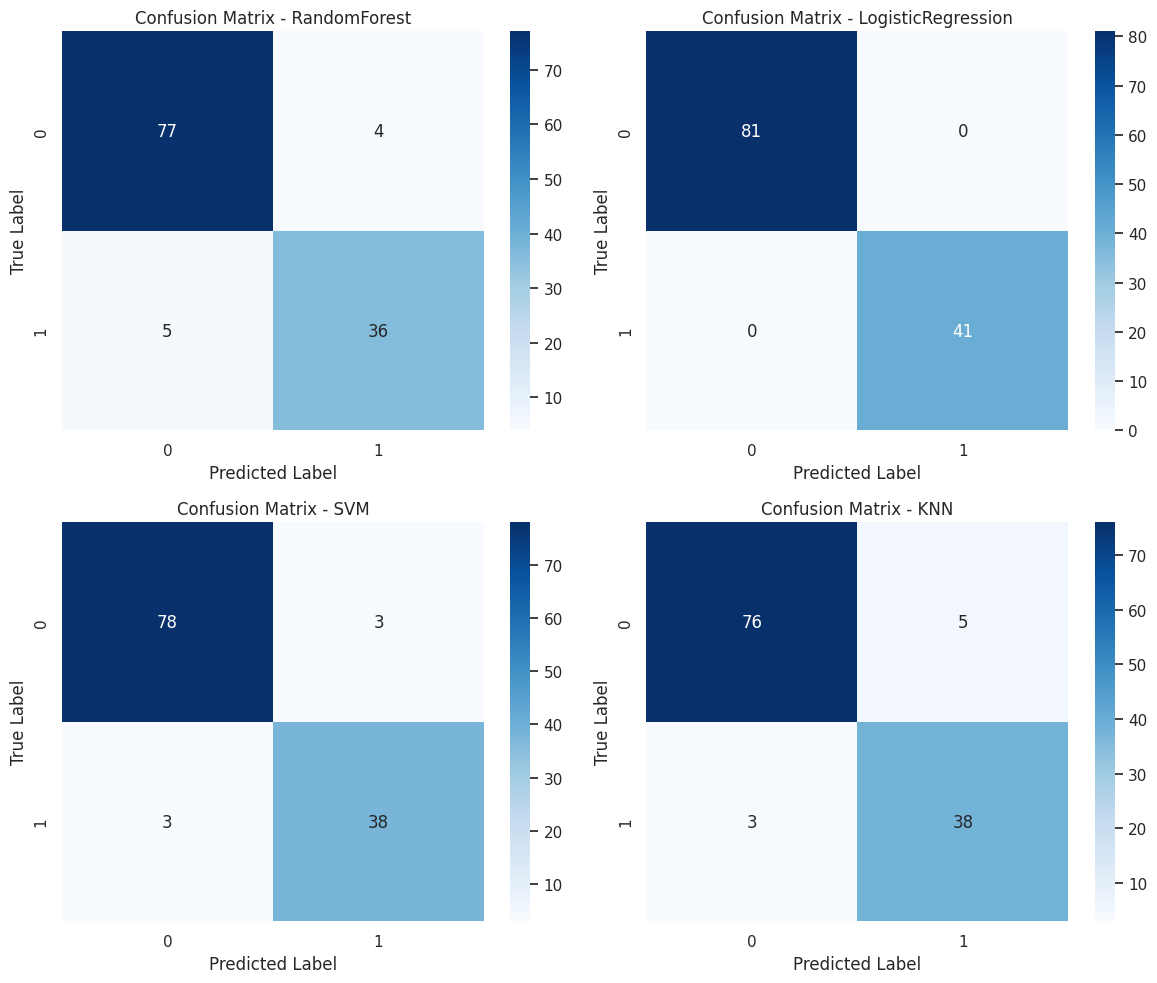

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(Y_test, Y_pred[name])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

Feature Importance (Random Forest)

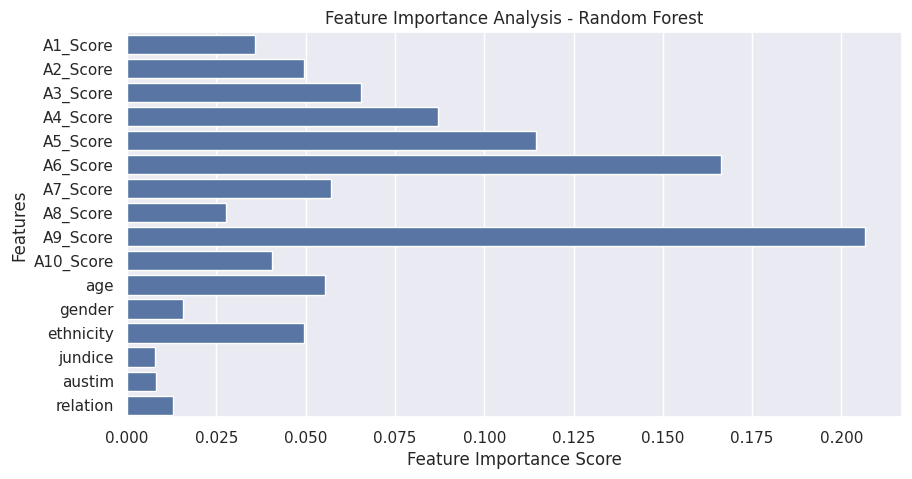

In [ ]:
# Extract feature importance
rf_model = models["RandomForest"]
feature_importance = rf_model.feature_importances_

# Create feature importance bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Analysis - Random Forest")
plt.show()


Building a Predictive System

In [ ]:
 #input_data = (1,	0,	0,	0, 0,	0,	0,	1	,0,	1	,34.0,	1,	2,	0,	0, 3.0	)  #No ASD=0

input_data=(1,	0,	1,	1,	1,	0,	1,	1,	1,	1,	26.0,	0,	9,
              0,	0,	4)  #ASD Detected=1

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('ASD Detected')
else:
  print('No ASD')

[1]
ASD Detected
